In [2]:
import pathlib

import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

sns.set()

We begin by reading the data and summarizing the variables.

In [3]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0601.csv'
df = pd.read_csv(path)
df.head()

,Score,Handicap
0,1.9,None
1,2.5,None
2,3.0,None
3,3.6,None
4,4.1,None


In [4]:
summary = df.describe()
summary

,Score
count,70.000000
mean,4.928571
std,1.718792
min,1.400000
25%,3.700000
50%,5.050000
75%,6.100000
max,8.500000


In [9]:
grp_summary = df.groupby('Handicap')['Score'].describe()
grp_summary

,count,mean,std,min,25%,50%,75%,max
Handicap,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,3.300,4.30,5.725,7.2
Crutches,14.0,5.921429,1.481776,3.7,4.500,6.10,7.150,8.5
Hearing,14.0,4.050000,1.532595,1.4,3.025,4.05,5.300,6.5
None,14.0,4.900000,1.793578,1.9,3.725,5.00,6.050,7.8
Wheelchair,14.0,5.342857,1.748280,1.7,4.725,5.70,6.350,7.6


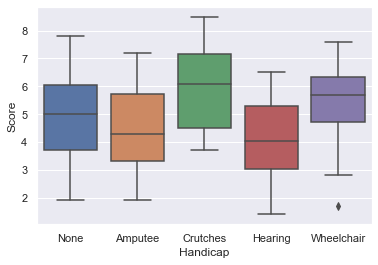

In [6]:
sns.boxplot(x='Handicap', y='Score', data=df)

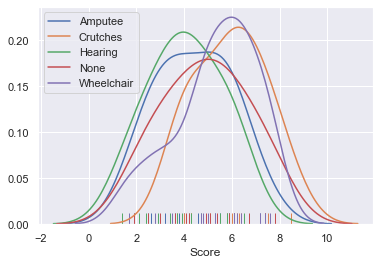

In [7]:
for diet, grp in df.groupby('Handicap'):
    sns.distplot(grp['Score'], rug=True, hist=False, label=diet)

Are the handicap scores statistically different?  I.e.,

$\it{H_0}:  \mu_{amputee} = \mu_{crutches} = \mu_{hearing} = \mu_{none} = \mu_{wheelchair}$

In [8]:
args = [grp['Score'] for _, grp in df.groupby('Handicap')]
scipy.stats.f_oneway(*args)

F_onewayResult(statistic=2.8615804656913246, pvalue=0.030126863924592084)

This is reasonable evidence that at least one group may be different.

Display 6.4:  compute the contrast between the wheelchair and crutches mean and the amputee and hearing means.


In [13]:
num = ((grp_summary['count'] - 1) * grp_summary['std'] ** 2).sum()
dof = grp_summary['count'].sum() - len(grp_summary)
sp = np.sqrt(num / dof)
print(sp, dof)

1.6329370828306633 65.0


The coefficients for the linear combination are $C_1 = -\frac{1}{2}$, $C_2 = \frac{1}{2}$, $C_3 = -\frac{1}{2}$, $C_4 = 0$, $C_5 = \frac{1}{2}$

Estimate the linear combination.

In [14]:
grp_summary['C'] = [-0.5, 0.5, -0.5, 0, 0.5]
grp_summary

,count,mean,std,min,...,50%,75%,max,C
Handicap,,,,,,,,,
Amputee,14.0,4.428571,1.585719,1.9,...,4.30,5.725,7.2,-0.5
Crutches,14.0,5.921429,1.481776,3.7,...,6.10,7.150,8.5,0.5
Hearing,14.0,4.050000,1.532595,1.4,...,4.05,5.300,6.5,-0.5
None,14.0,4.900000,1.793578,1.9,...,5.00,6.050,7.8,0.0
Wheelchair,14.0,5.342857,1.748280,1.7,...,5.70,6.350,7.6,0.5


In [15]:
g = (grp_summary['mean'] * grp_summary['C']).sum()
g

1.3928571428571423

Find the standard error of the estimate.

In [16]:
se = sp * np.sqrt((grp_summary['C'] ** 2 / grp_summary['count']).sum())
se

0.4364207927221745

Construct a 95% confidence interval.

In [17]:
scipy.stats.t.interval(0.95, dof, loc=g, scale=se)

(0.5212646339805043, 2.2644496517337807)